# Laboratorio 1: Conceptos básicos de aprendizaje automático

En este laboratorio les tocará probar con distintos parámetros de los algoritmos de aprendizaje automático aprendidos hasta ahora. La idea es que vean como la selección de atributos, el cambio de hiperparámetros, y los distintos algoritmos afectan los resultados de un regresor o clasificador sobre un conjunto de datos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

from ml.visualization import plot_confusion_matrix, classifier_boundary

np.random.seed(1234)  # Setup seed to be more deterministic

%matplotlib inline

## Regresión

### Carga de datos

In [2]:
boston_data = load_boston()
len(boston_data['data'])

506

Como el dataset de boston tiene 506 muestras, generamos 506 indices aleatoriamente
para luego obtener dos subsets de 80% y 20% del dataset desordenados

In [3]:
np.random.permutation(506)


array([ 64, 100, 400, 485, 454, 288, 112, 478,  66, 187, 474,  71, 205,
       133, 247, 333, 444, 207, 393, 398, 200, 352, 363,   7,  92,  59,
       358, 213, 349, 124,  11,  27, 131, 441, 329, 409, 265, 319, 387,
       417, 404,  29, 280, 307, 421, 301, 351, 268,  22, 285, 362, 304,
       160,  73, 369,  57, 405, 341, 353, 480,  40, 448, 111, 192, 403,
        67, 264, 310, 166, 224, 156, 321, 477, 218,  70, 395, 225, 355,
       123, 138, 226, 262,  74, 129, 181, 406, 296, 252,  13,  44,  25,
       491,  91, 496, 149, 228, 424, 350, 191, 239, 109, 219, 221, 375,
       450, 163, 402, 378,   0, 315, 437, 194, 486, 342, 148,  51, 189,
       347, 141,  97,  78, 391,  21,  55, 104, 253,  43, 255, 115, 230,
       122, 169, 427, 386, 366, 373,  24, 306, 411, 263, 118, 443, 305,
       492, 300, 234,  90, 314, 287, 384, 108, 338,  99, 102, 416, 266,
       101, 501, 426,  33, 140, 198,  54, 447, 432,  36, 298,  37, 215,
       323, 299, 494, 493, 408, 308, 388, 418, 214, 270, 498, 11

In [4]:

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(506)
shuff_train = shuff_data[:400]
shuff_val = shuff_data[400:]

X_train = boston_data['data'][shuff_train]
X_val = boston_data['data'][shuff_val]

y_train = boston_data['target'][shuff_train]
y_val = boston_data['target'][shuff_val]

# Necesario para poder hacer un regresor por feature
feature_map = {feature: idx for idx, feature in enumerate(boston_data['feature_names'])}
feature_map


{'CRIM': 0,
 'ZN': 1,
 'INDUS': 2,
 'CHAS': 3,
 'NOX': 4,
 'RM': 5,
 'AGE': 6,
 'DIS': 7,
 'RAD': 8,
 'TAX': 9,
 'PTRATIO': 10,
 'B': 11,
 'LSTAT': 12}

In [5]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Regresión sin regularización

Para revisar cómo afecta el cambio de parámetros y los distintos tipos de regresores y atributos (características) al resultado final del algoritmo de aprendizaje automático, lo que se va a hacer es entrenar el regresor tomando sólo un atributo y visualizar eso.

Se busca entrenar utilizando el conjunto de entrenamiento (el terminado en `train`) y evaluar utilizando el conjunto de validación (el terminado en `val`). Luego se visualiza la función calculada para cada conjunto y se la compara.

Los atributos posibles están listados en la descripción del conjunto de datos en la celda anterior. No todos son útiles para visualizar, en particular solo nos interesan los atributos numéricos y descartamos los atributos que se listan a continuación:

- `CHAS`: Atributo categórico (toma valor 0 o 1).
- `RAD`: Atributo categórico (índice).
- `MEDV`: Este valor se lo lista como atributo en la descripción del conjunto de datos pero en realidad es el valor de `y`, i.e. es el valor que tratamos de aproximar con el algoritmo de aprendizaje automático.

In [6]:
# Seleccionamos un atributo de los listados en la descripción que no sea categórico
selected_feature = 'AGE'  # TODO: modificar esto por algún otro valor para ver como cambian los resultados


In [7]:
numeric_features = ['AGE', 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [8]:
feature_col = feature_map[selected_feature]
feature_col

6

In [9]:
X_train[:, feature_col]


array([ 29.1,  96.6,  97.4,  67. , 100. ,  30.8,  89. ,  78.1, 100. ,
        45.4,  22.3,  97.2,  79.7,  65.2,  96.7,  58.8,  31.3,  21.8,
        37.8,  91.9,  84.7,  15.8, 100. ,  62.5,  97.9,  45.6,  89.1,
        28.1,  58.5,  38.3,  73.1,  30.2,  98.8, 100. ,   6. ,  40.3,
        66.2, 100. ,  53.2,  31.9,  36.8,  96.4, 100. , 100. ,  33.1,
        87.3, 100. ,  97.3,  95.8,  98.9,  70.6,  29.7,  49.3,  88. ,
         8.4,  68.2,  65.1,  93. ,  94.7,  54.2,  84.2,  86.3,  63.1,
        92.6,  52.3,  87.9,  17.5,  68.7,  81.3,  97.1,  53.7,   9.8,
        92.9,  33.5,  97.3,  81.8,  90.8,  93.6, 100. ,  92.4,  49.9,
        54.4,  31.5,  98.8,  74.9,  88.5, 100. ,  44.4,  92.6,  15.7,
        21.9,  65.4,  15.3,  85.7,  92.7,  19.1,  32.2,  52.8,  80.3,
        92.9,  34.2,  85.1,  79.9,  97. , 100. ,  53.8, 100. ,  27.6,
       100. , 100. ,  89.5,  88.8,  98.9,  89.2,  95. ,  82.6,  97.4,
       100. ,  98.8,  71.7,  58.7,  86.9,  71.9,  76.5,  94. ,  33.8,
        91.2, 100. ,

In [10]:
X_train_feature = X_train[:, feature_col].reshape(-1, 1)  # Hay que ser que sea una matriz no un vector para que funcione con scikit learn
X_train_feature

array([[ 29.1],
       [ 96.6],
       [ 97.4],
       [ 67. ],
       [100. ],
       [ 30.8],
       [ 89. ],
       [ 78.1],
       [100. ],
       [ 45.4],
       [ 22.3],
       [ 97.2],
       [ 79.7],
       [ 65.2],
       [ 96.7],
       [ 58.8],
       [ 31.3],
       [ 21.8],
       [ 37.8],
       [ 91.9],
       [ 84.7],
       [ 15.8],
       [100. ],
       [ 62.5],
       [ 97.9],
       [ 45.6],
       [ 89.1],
       [ 28.1],
       [ 58.5],
       [ 38.3],
       [ 73.1],
       [ 30.2],
       [ 98.8],
       [100. ],
       [  6. ],
       [ 40.3],
       [ 66.2],
       [100. ],
       [ 53.2],
       [ 31.9],
       [ 36.8],
       [ 96.4],
       [100. ],
       [100. ],
       [ 33.1],
       [ 87.3],
       [100. ],
       [ 97.3],
       [ 95.8],
       [ 98.9],
       [ 70.6],
       [ 29.7],
       [ 49.3],
       [ 88. ],
       [  8.4],
       [ 68.2],
       [ 65.1],
       [ 93. ],
       [ 94.7],
       [ 54.2],
       [ 84.2],
       [ 86.3],
       [

In [11]:
X_train_feature.shape  # NO ENTIENDO ESTO


(400, 1)

In [12]:
X_val_feature = X_val[:, feature_col].reshape(-1, 1)


### Regresión lineal

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

CONSULTA: Tal vez entendi mal pero , yo entendi que LineaRegression nos debe dar una función de regresión(regressor) y no un clasificador(para eso esta Logistic Regression)

In [14]:
# Entrenamos un clasificador utilizando sólo ese atributo sobre el conjunto de entrenamiento (X_train, y_train)
model = LinearRegression()
model.fit(X_train_feature, y_train)

# Evaluamos el desempeño del clasificador utilizando la media del error cuadrado (MSE o mean squared error)
# sobre el conjunto de datos de entrenamiento (X_train, y_train) y lo comparamos con el de validación (X_val, y_val)
# Mientras más cercano a cero mejor
print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_train_feature)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_val, model.predict(X_val_feature)))

Media del error cuadrado para entrenamiento: 73.47
Media del error cuadrado para validación: 68.56


##### Visualización de la regresión lineal

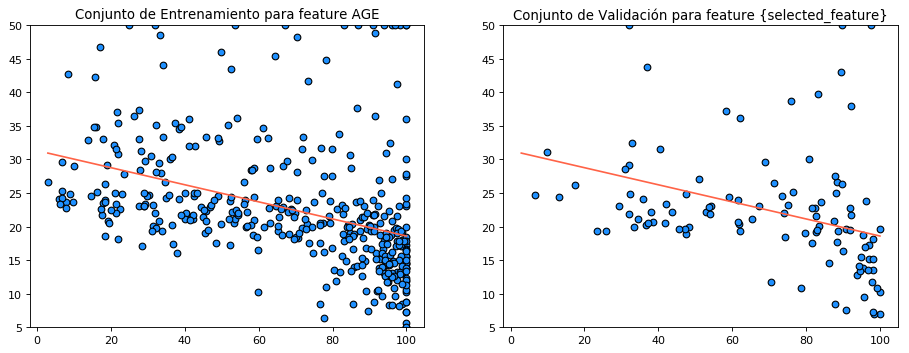

In [15]:
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
y_range_start = np.min(np.r_[y_train, y_val])
y_range_stop = np.max(np.r_[y_train, y_val])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title(f"Conjunto de Entrenamiento para feature {selected_feature}")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación para feature {selected_feature}")

plt.show()

El scatter plot  muestra que el feature **AGE** tiene datos demasiado dispersos y que en principio no se ajusta bien con una regression lineal. No parece que se puedan ajustar bien tampoco con una regression polinomial.
Analizamos el resto de los features:

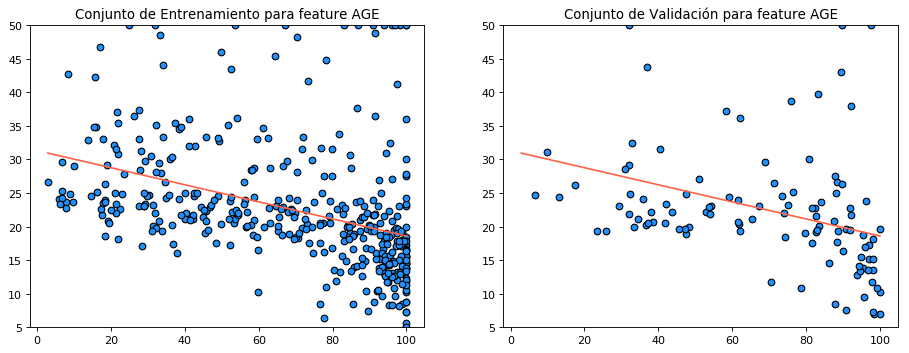

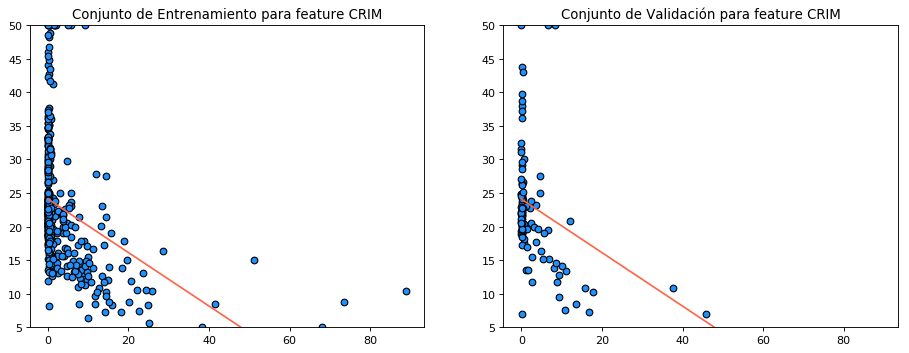

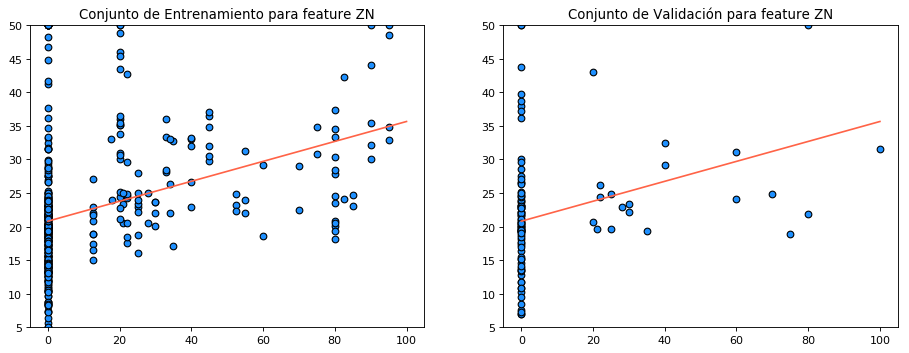

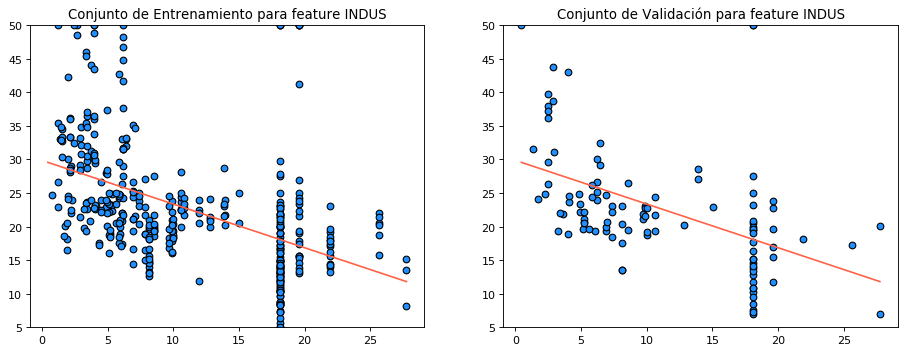

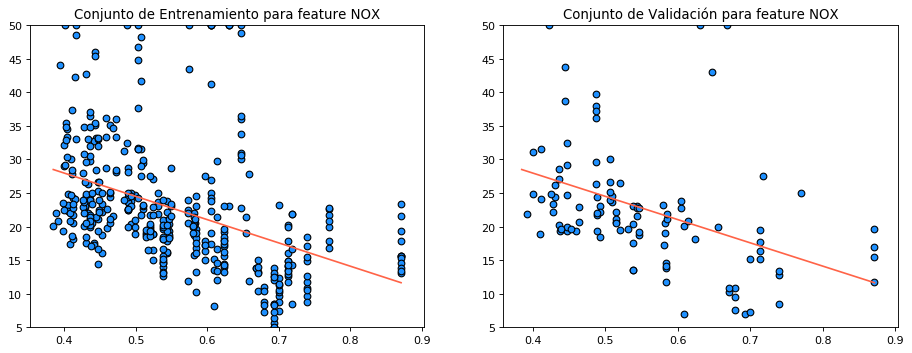

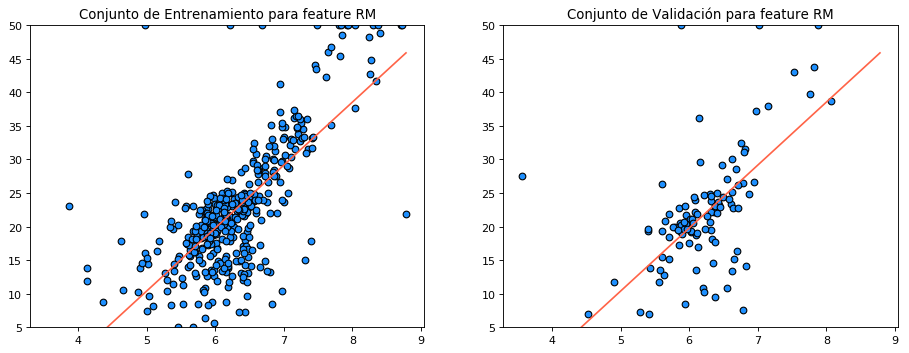

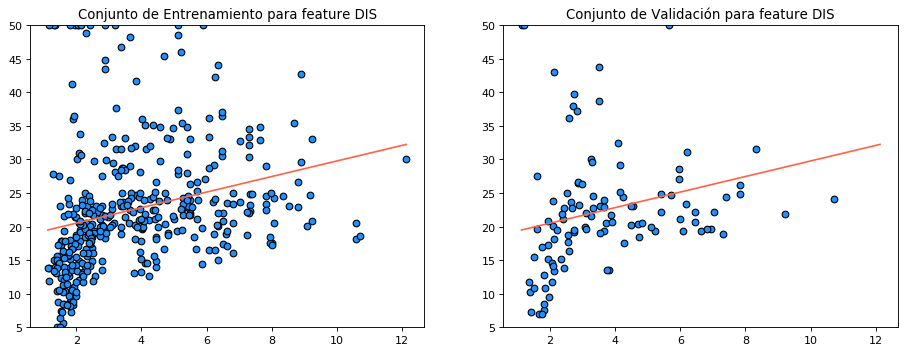

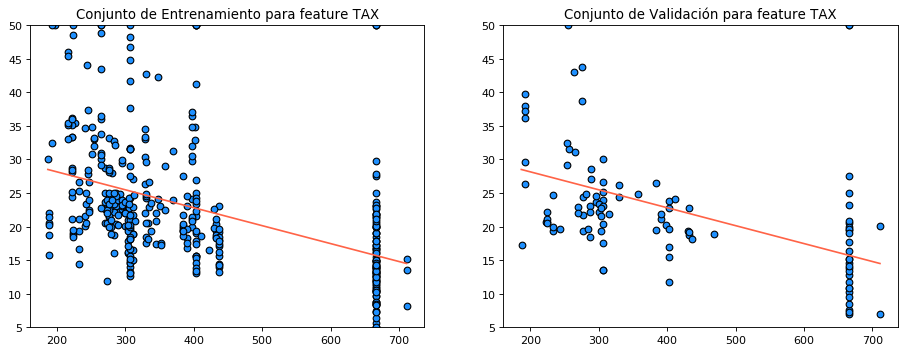

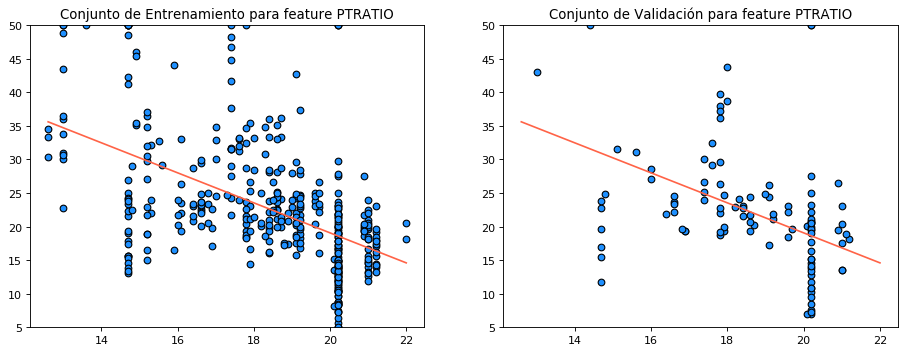

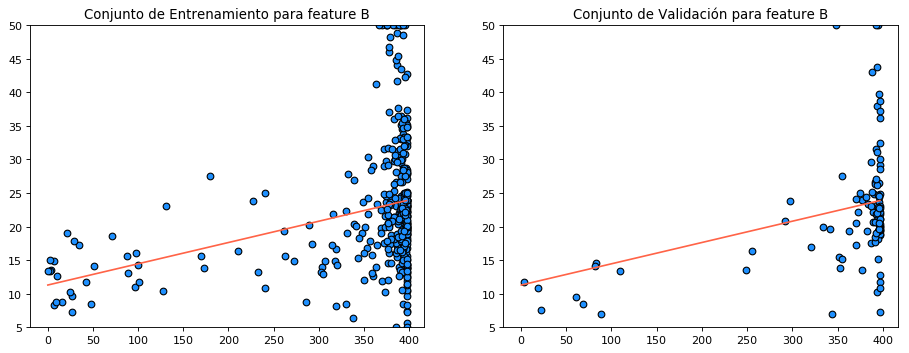

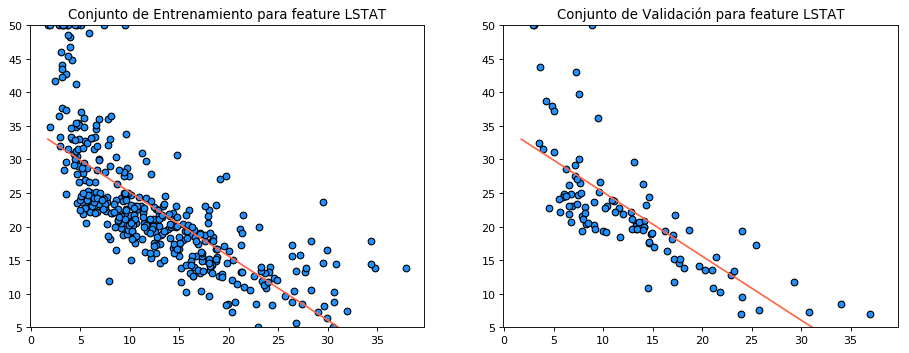

In [16]:
for selected_feature in numeric_features:
    feature_col = feature_map[selected_feature]
    X_train_feature = X_train[:, feature_col].reshape(-1, 1)  # Hay que ser que sea una matriz no un vector para que funcione con scikit learn
    X_val_feature = X_val[:, feature_col].reshape(-1, 1)
    
    # Entrenamos un clasificador utilizando sólo ese atributo sobre el conjunto de entrenamiento (X_train, y_train)
    model = LinearRegression()
    model.fit(X_train_feature, y_train)
    plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

    X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
    X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
    y_range_start = np.min(np.r_[y_train, y_val])
    y_range_stop = np.max(np.r_[y_train, y_val])
    X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

    # Conjunto de entrenamiento
    plt.subplot(1, 2, 1)
    plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title(f"Conjunto de Entrenamiento para feature {selected_feature}")

    # Conjunto de validación
    plt.subplot(1, 2, 2)
    plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title(f"Conjunto de Validación para feature {selected_feature}")

    plt.show()
    

### Regresión polinomial

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [17]:
for polynomial_degree in range(10):

    # Probamos distintos grados del polinomio

    poly_features = PolynomialFeatures(polynomial_degree)
    poly_features.fit(X_train_feature)
    X_poly_train = poly_features.transform(X_train_feature)
    X_poly_val = poly_features.transform(X_val_feature)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    mean_squared_training_error = mean_squared_error(y_train, model.predict(X_poly_train))
    print(f'Media del error cuadrado para entrenamiento del feature {selected_feature} : {mean_squared_training_error:.2f}')
    
    mean_squared_val_error = mean_squared_error(y_train, model.predict(X_poly_train))
    print(f'Media del error cuadrado para validación del feature {selected_feature} : {mean_squared_val_error:.2f}')


Media del error cuadrado para entrenamiento del feature LSTAT : 86.81
Media del error cuadrado para validación del feature LSTAT : 86.81
Media del error cuadrado para entrenamiento del feature LSTAT : 39.77
Media del error cuadrado para validación del feature LSTAT : 39.77
Media del error cuadrado para entrenamiento del feature LSTAT : 30.05
Media del error cuadrado para validación del feature LSTAT : 30.05
Media del error cuadrado para entrenamiento del feature LSTAT : 28.66
Media del error cuadrado para validación del feature LSTAT : 28.66
Media del error cuadrado para entrenamiento del feature LSTAT : 27.31
Media del error cuadrado para validación del feature LSTAT : 27.31
Media del error cuadrado para entrenamiento del feature LSTAT : 26.79
Media del error cuadrado para validación del feature LSTAT : 26.79
Media del error cuadrado para entrenamiento del feature LSTAT : 26.78
Media del error cuadrado para validación del feature LSTAT : 26.78
Media del error cuadrado para entrenamien

##### Visualización de la regresión polinomial

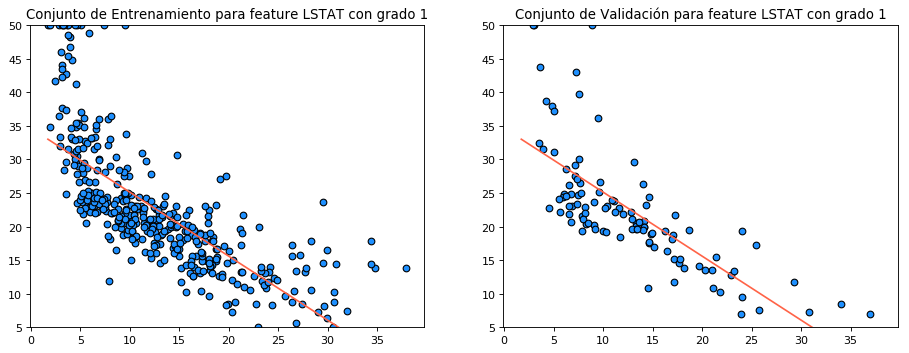

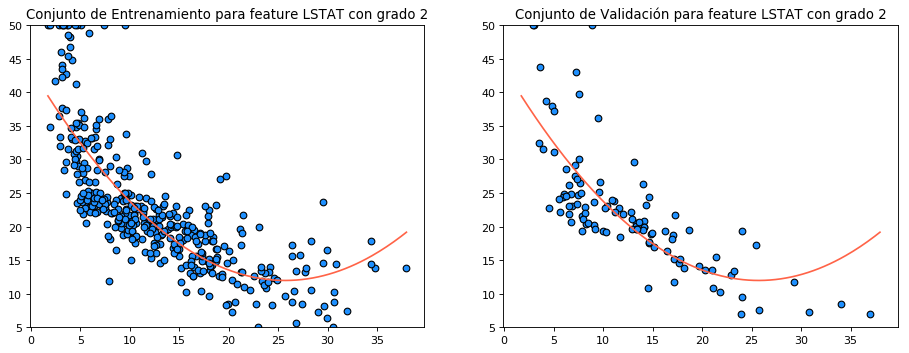

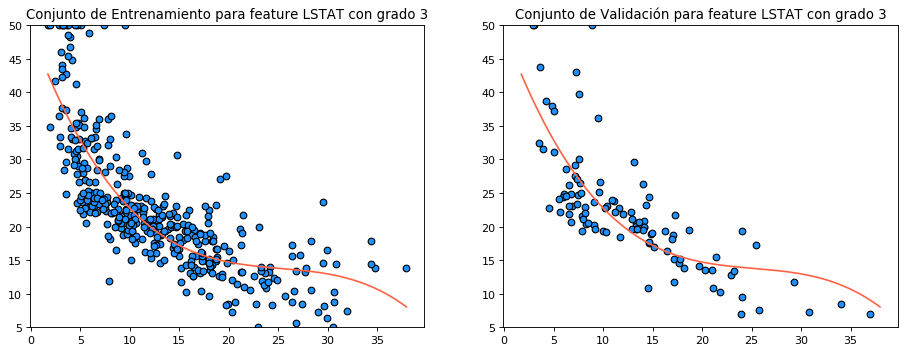

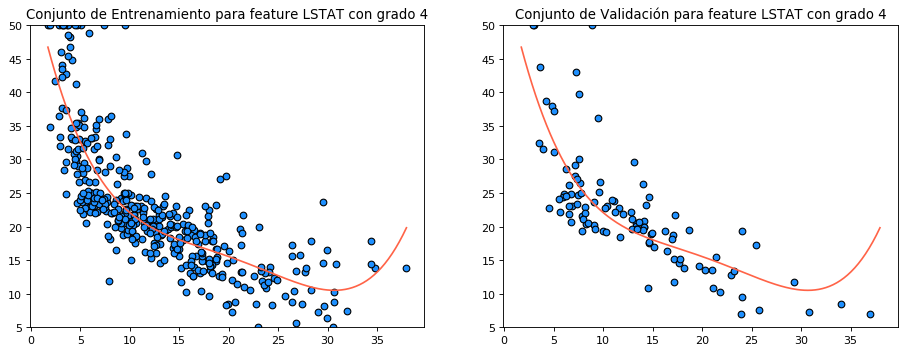

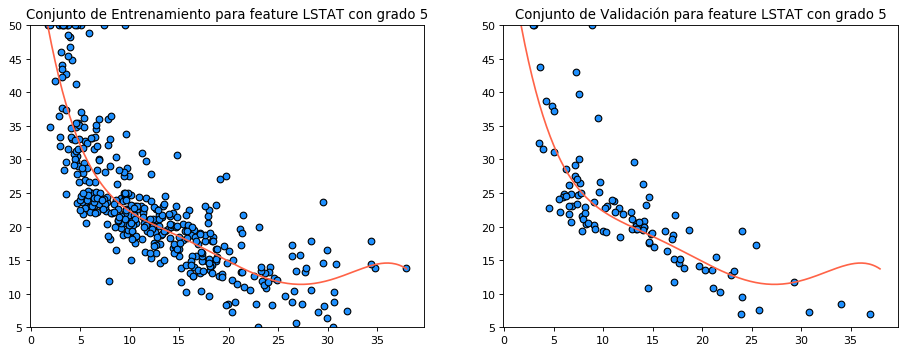

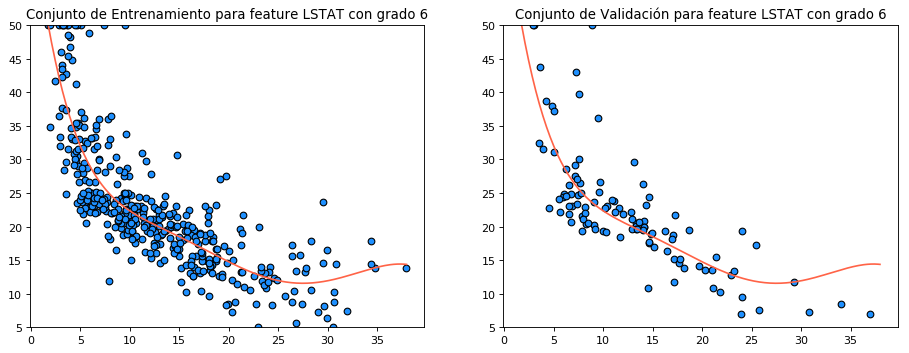

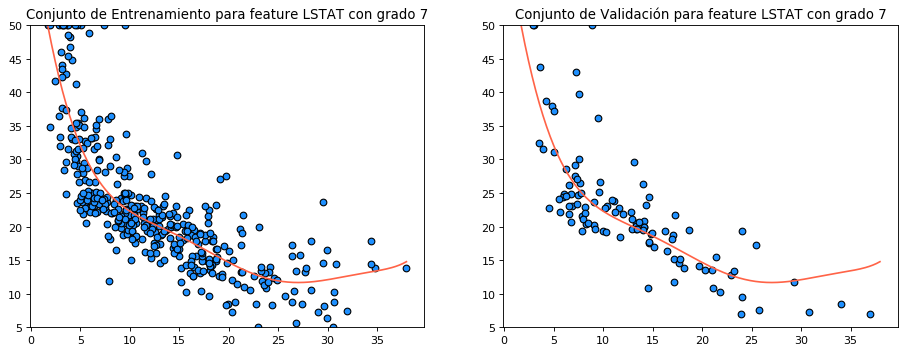

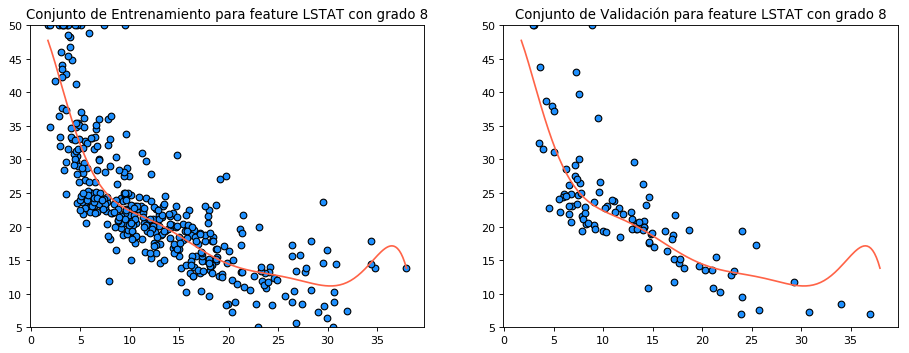

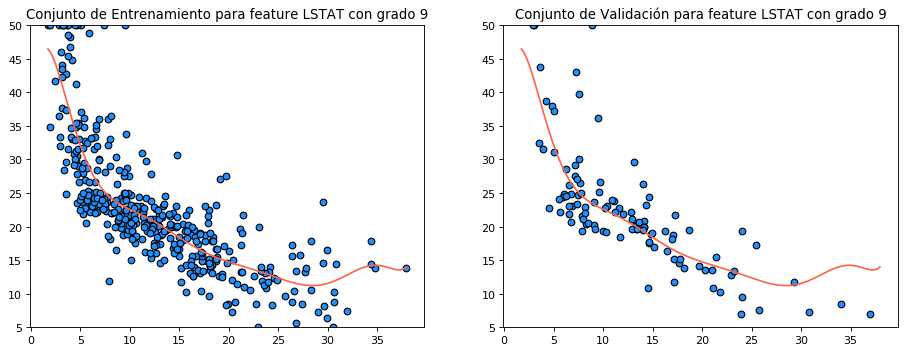

In [18]:
for polynomial_degree in range(1,10):

    # Probamos distintos grados del polinomio

    poly_features = PolynomialFeatures(polynomial_degree)
    poly_features.fit(X_train_feature)
    X_poly_train = poly_features.transform(X_train_feature)
    X_poly_val = poly_features.transform(X_val_feature)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

    X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
    X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
    y_range_start = np.min(np.r_[y_train, y_val])
    y_range_stop = np.max(np.r_[y_train, y_val])
    X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
    X_linspace_poly = poly_features.transform(X_linspace)

    # Conjunto de entrenamiento
    plt.subplot(1, 2, 1)
    plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title(f"Conjunto de Entrenamiento para feature {selected_feature} con grado {polynomial_degree}")


    # Conjunto de validación
    plt.subplot(1, 2, 2)
    plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title(f"Conjunto de Validación para feature {selected_feature} con grado {polynomial_degree}")

    plt.show()

### Regresión lineal con regularización

- https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [19]:

for alpha in np.arange(0, 5, 0.1):
    print(f'alpha: {alpha} para feature: {selected_feature}' )
    #alpha =  0.01 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`.

    model = Ridge(alpha=alpha)
    model.fit(X_train_feature, y_train)

    print('Media del error cuadrado para entrenamiento: %.2f' % 
          mean_squared_error(y_train, model.predict(X_train_feature)))
    print('Media del error cuadrado para validación: %.2f' %
          mean_squared_error(y_val, model.predict(X_val_feature)))

alpha: 0.0 para feature: LSTAT
Media del error cuadrado para entrenamiento: 39.77
Media del error cuadrado para validación: 33.66
alpha: 0.1 para feature: LSTAT
Media del error cuadrado para entrenamiento: 39.77
Media del error cuadrado para validación: 33.66
alpha: 0.2 para feature: LSTAT
Media del error cuadrado para entrenamiento: 39.77
Media del error cuadrado para validación: 33.66
alpha: 0.30000000000000004 para feature: LSTAT
Media del error cuadrado para entrenamiento: 39.77
Media del error cuadrado para validación: 33.66
alpha: 0.4 para feature: LSTAT
Media del error cuadrado para entrenamiento: 39.77
Media del error cuadrado para validación: 33.66
alpha: 0.5 para feature: LSTAT
Media del error cuadrado para entrenamiento: 39.77
Media del error cuadrado para validación: 33.66
alpha: 0.6000000000000001 para feature: LSTAT
Media del error cuadrado para entrenamiento: 39.77
Media del error cuadrado para validación: 33.66
alpha: 0.7000000000000001 para feature: LSTAT
Media del err

##### Visualización de la regresión lineal

alpha: 4.9 para feature: LSTAT


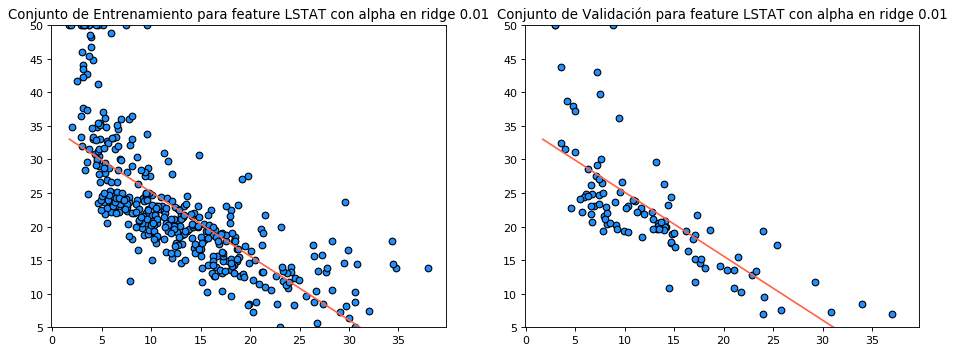

In [20]:

print(f'alpha: {alpha} para feature: {selected_feature}' )
alpha =  0.01 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`.

model = Ridge(alpha=alpha)
model.fit(X_train_feature, y_train)

plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
y_range_start = np.min(np.r_[y_train, y_val])
y_range_stop = np.max(np.r_[y_train, y_val])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title(f"Conjunto de Entrenamiento para feature {selected_feature} con alpha en ridge {alpha}")


# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title(f"Conjunto de Validación para feature {selected_feature} con alpha en ridge {alpha}")
plt.show()

No tiene sentido mucho sentido aplicar el ridge a un polinomio de grado 1(pues no estamos suavizando nada)
De echo con una recta tenemos un problema de underfitting y el ridge sirve para suavizar polinomios con grados altos, que ajustan muy bien en etapa de entrenamiento pero no en etapa de validación(overfitting)


### Regresión polinomial con regularización

Quisimos suavizar polinomios de grado 5 en adelante , pero obtenemos el siguiente error:'result may not be accurate.'
Probamos suavizar un polinomio de  grado 4.

In [21]:
polynomial_degree = 4
alpha = 100

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train_feature)
X_poly_train = poly_features.transform(X_train_feature)
X_poly_val = poly_features.transform(X_val_feature)

model = Ridge(alpha=alpha)
model.fit(X_poly_train, y_train)

print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_poly_train)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_val, model.predict(X_poly_val)))

Media del error cuadrado para entrenamiento: 29.98
Media del error cuadrado para validación: 30.62


##### Visualización de la regresión polinomial

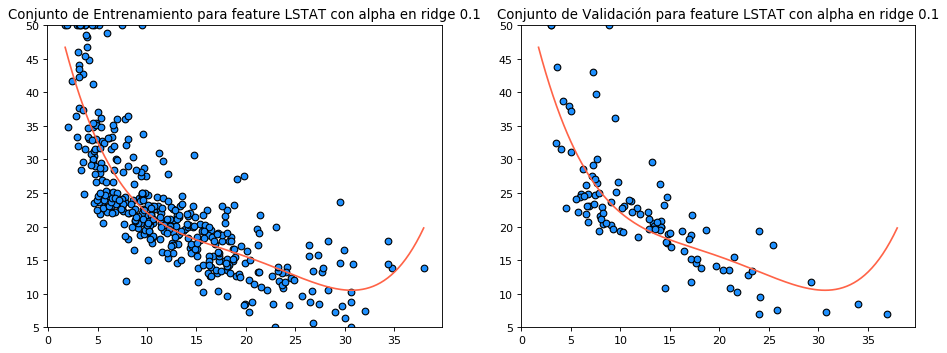

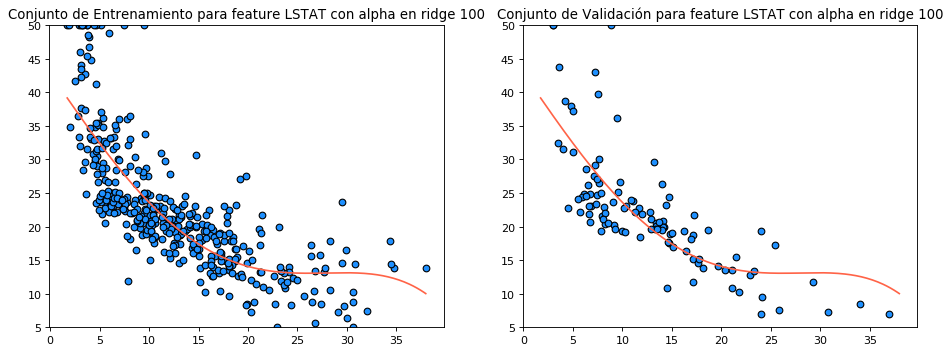

In [22]:
for alpha in (0.1, 100):
    plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

    polynomial_degree = 4
    poly_features = PolynomialFeatures(polynomial_degree)
    poly_features.fit(X_train_feature)
    X_poly_train = poly_features.transform(X_train_feature)
    X_poly_val = poly_features.transform(X_val_feature)

    model = Ridge(alpha=alpha)
    model.fit(X_poly_train, y_train)
    
    X_range_start = np.min(np.r_[X_train_feature, X_val_feature])
    X_range_stop = np.max(np.r_[X_train_feature, X_val_feature])
    y_range_start = np.min(np.r_[y_train, y_val])
    y_range_stop = np.max(np.r_[y_train, y_val])
    X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
    X_linspace_poly = poly_features.transform(X_linspace)

    # Conjunto de entrenamiento
    plt.subplot(1, 2, 1)
    plt.scatter(X_train_feature, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title(f"Conjunto de Entrenamiento para feature {selected_feature} con alpha en ridge {alpha}")

    # Conjunto de validación
    plt.subplot(1, 2, 2)
    plt.scatter(X_val_feature, y_val, facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
    plt.ylim(y_range_start, y_range_stop)
    plt.title(f"Conjunto de Validación para feature {selected_feature} con alpha en ridge {alpha}")

    plt.show()

Se observa que para un $\alpha$ muy alto(100) en tiempo de validación el polinomio de grado 4 ajusta bien

## Clasificación binaria

La clasificación binaria tiene dos posibles etiquetas para su clasificación: SI y NO (o 0 y 1, o -1 y 1). Nuevamente, se busca entrenar utilizando el conjunto de entrenamiento (el terminado en `train`) y evaluar utilizando el conjunto de validación (el terminado en `val`). Luego se visualiza la función calculada para cada conjunto y se la compara.

Similar al caso anterior, para poder visualizar los distintos atributos y cómo estos afectan el modelo, debemos hacer uso de una selección de atributos a mano. En este caso todos los atributos son válidos, puesto que todos son numéricos. Como tenemos una clasificación, lo que buscamos ver es la frontera de decisión eligiendo distintos atributos y parámetros para distintos clasificadores. En este caso elegimos 2 atributos ya que la clase se representará por color dentro del gráfico.

### Carga de datos

In [23]:
breast_cancer_data = load_breast_cancer()

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(569)
shuff_train = shuff_data[:400]
shuff_val = shuff_data[400:]

X_train = breast_cancer_data['data'][shuff_train]
X_val = breast_cancer_data['data'][shuff_val]

y_train = breast_cancer_data['target'][shuff_train]
y_val = breast_cancer_data['target'][shuff_val]

feature_map = {feature: idx for idx, feature in enumerate(breast_cancer_data['feature_names'])}

print(breast_cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [24]:
print("Listado de atributos\n====================")
for feature in breast_cancer_data['feature_names']:
    print("- %s" % feature)

Listado de atributos
- mean radius
- mean texture
- mean perimeter
- mean area
- mean smoothness
- mean compactness
- mean concavity
- mean concave points
- mean symmetry
- mean fractal dimension
- radius error
- texture error
- perimeter error
- area error
- smoothness error
- compactness error
- concavity error
- concave points error
- symmetry error
- fractal dimension error
- worst radius
- worst texture
- worst perimeter
- worst area
- worst smoothness
- worst compactness
- worst concavity
- worst concave points
- worst symmetry
- worst fractal dimension


In [274]:
# Seleccionamos dos atributo de los listados en el apartado anterior, uno para el eje x y otro para el eje y
# TODO: cambiar con estos features
x_feature = 'mean radius'
y_feature = 'mean texture'

x_feature_col = feature_map[x_feature]
y_feature_col = feature_map[y_feature]
X_train_feature = X_train[:, [x_feature_col, y_feature_col]]
X_val_feature = X_val[:, [x_feature_col, y_feature_col]]

### Perceptrón

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [275]:
penalty = 12 # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados), elasticnet (l1 + l2).
alpha = 0.1 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`.
max_iter = 100 # TODO: Cantidad máxima de iteraciones del algoritmo

model = Perceptron(penalty=penalty, alpha=alpha, max_iter=max_iter)
model.fit(X_train_feature, y_train)

# Evaluamos el desempeño del clasificador utilizando la exactitud (accuracy) sobre el conjunto
# de datos de entrenamiento (X_train, y_train) y lo comparamos con el de validación (X_val, y_val)
# La exactitud toma valor en el rango [0, 1] donde más alto es mejor
print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))

ValueError: Penalty 12 is not supported. 

#### Matriz de confusión

La matriz de confusión sirve en clasificación para ver que tanto se desviaron las instancias (de entrenamiento o de validación) de su valor real.

ValueError: shapes (400,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)

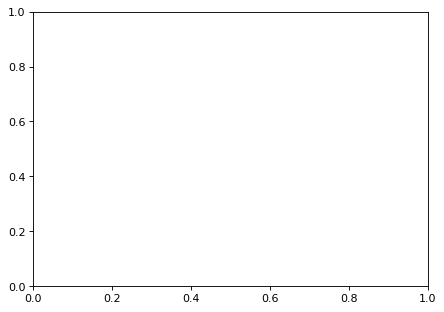

In [276]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

#### Visualización de la frontera de decisión

In [277]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

ValueError: shapes (6352074,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)

<Figure size 1120x400 with 0 Axes>

### Regresión logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [278]:
penalty =  # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha =  # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.

model = LogisticRegression(penalty=penalty, C=1./alpha)
model.fit(X_train_feature, y_train)

print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))

SyntaxError: invalid syntax (<ipython-input-278-9f001cad0482>, line 1)

#### Matriz de confusión

ValueError: shapes (400,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)

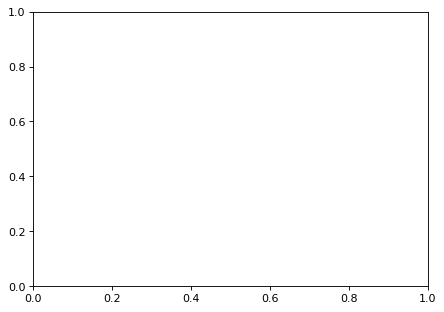

In [279]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

#### Visualización de la frontera de decisión

In [280]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

ValueError: shapes (6352074,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)

<Figure size 1120x400 with 0 Axes>

### Vecinos más cercanos

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [281]:
n_neighbors = # TODO: Cantidad de vecinos a tener en cuenta
metric =  # TODO: Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model.fit(X_train_feature, y_train)

print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))

SyntaxError: invalid syntax (<ipython-input-281-e7c36b666491>, line 1)

#### Matriz de confusión

ValueError: shapes (400,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)

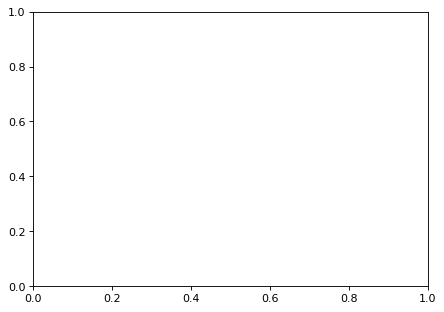

In [282]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=breast_cancer_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

#### Visualización de la frontera de decisión

In [283]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue'])
cmap_back = ListedColormap(['lightcoral', 'skyblue'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

ValueError: shapes (6352074,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)

<Figure size 1120x400 with 0 Axes>

## Clasificación multiclase

Ahora veremos clasificación multiclase. Muy similar al caso anterior, con la diferencia de que en este caso hay más de dos etiquetas posibles para clasificación. Se utilizará el método `one-vs-all` (o también `one-vs-rest`) para hacer posible la clasificaicón.

Una vez más tenemos que decidir dos features para poder visualizar los modelos.

### Carga de datos

In [284]:
iris_data = load_iris()

# Utilizamos aproximadamente 80% de los datos para entrenamiento y 20% para validación
shuff_data = np.random.permutation(150)
shuff_train = shuff_data[:120]
shuff_val = shuff_data[120:]

X_train = iris_data['data'][shuff_train]
X_val = iris_data['data'][shuff_val]

y_train = iris_data['target'][shuff_train]
y_val = iris_data['target'][shuff_val]

feature_map = {feature: idx for idx, feature in enumerate(iris_data['feature_names'])}

print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [285]:
print("Listado de atributos\n====================")
for feature in iris_data['feature_names']:
    print("- %s" % feature)

Listado de atributos
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)


In [286]:
# Seleccionamos dos atributo de los listados en el apartado anterior, uno para el eje x y otro para el eje y
# TODO: Cambiar los atributos y ver como se modifica el resultado
x_feature = 'sepal length (cm)'
y_feature = 'sepal width (cm)'

x_feature_col = feature_map[x_feature]
y_feature_col = feature_map[y_feature]
X_train_feature = X_train[:, [x_feature_col, y_feature_col]]
X_val_feature = X_val[:, [x_feature_col, y_feature_col]]

### Regresión logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [287]:
penalty =  # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha =  # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.

model = LogisticRegression(penalty=penalty, C=1./alpha, multi_class='ovr')
model.fit(X_train_feature, y_train)

print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))

SyntaxError: invalid syntax (<ipython-input-287-c9ea23f74717>, line 1)

#### Matriz de confusión

ValueError: shapes (120,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)

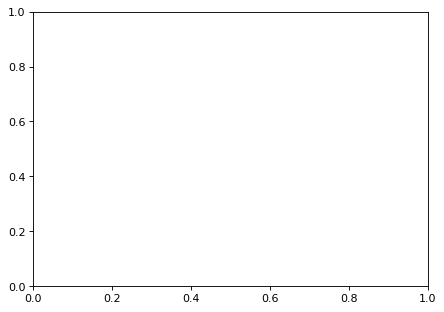

In [288]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

#### Visualización de la frontera de decisión

In [289]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

ValueError: shapes (98800,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)

<Figure size 1120x400 with 0 Axes>

### Vecinos más cercanos

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [290]:
n_neighbors = # TODO: Cantidad de vecinos a tener en cuenta
metric =  # TODO: Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model.fit(X_train_feature, y_train)

print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train_feature)))
print('Exactitud para validación: %.2f' % accuracy_score(y_val, model.predict(X_val_feature)))

SyntaxError: invalid syntax (<ipython-input-290-e7c36b666491>, line 1)

#### Matriz de confusión

ValueError: shapes (120,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)

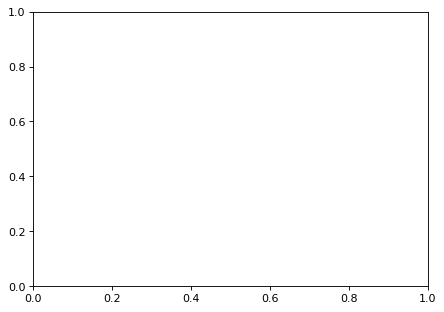

In [291]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names,
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_val, model.predict(X_val_feature)),
                      classes=iris_data.target_names, normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

#### Visualización de la frontera de decisión

In [292]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

xx, yy, Z = classifier_boundary(np.r_[X_train_feature, X_val_feature], model)

cmap_dots = ListedColormap(['tomato', 'dodgerblue', 'goldenrod'])
cmap_back = ListedColormap(['lightcoral', 'skyblue', 'palegoldenrod'])

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_train_feature[:, 0], X_train_feature[:, 1], c=y_train, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, Z, cmap=cmap_back)
plt.scatter(X_val_feature[:, 0], X_val_feature[:, 1], c=y_val, cmap=cmap_dots, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Conjunto de Validación")

plt.show()

ValueError: shapes (98800,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)

<Figure size 1120x400 with 0 Axes>